# Feature engineering

In app experience : how they interact with the app which features they click like playlist hamburger button youtube <br>
notification events : notication vidio notfication, features which tries to engage the user <br>
adsEvents : ads click promotional events <br>
engagement events : 
first_open_custom_date_event should be removed from here 
We will take sum of all these and normalize it using min max scaler as to get the score of such things

Engagment, Number of sessions num session can be mixed and than subsetted

share this feature behaving strangely

81616774e29888fe78a3e902f6cecdc9 this id

abnormal user_id : maybe because they can user id for testing purposes

My final analysis of the results can be wrong as for that i need to know the meaning of every column and how the data is being stored in the database

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Reading the data genereted from pyspark

In [ ]:
filename = '/content/drive/MyDrive/Audify/ready_for_eda.csv'
df = pd.read_csv(filename)

# Features
Total unique users in the time period : 6598460 <br>
Features considered : 36

In [ ]:
df.shape

(6598460, 43)

In [ ]:
df.columns = ['user_pseudo_id', 'widget_events', 'totalEventCount',
       'bottom_mini_playing_bar_event', 'sessNum',
       'notification_events', 'video_notification_event',
       'app_clear_data', 'floating_player_event',
       'interstitial_ad_events', 'lyrics_page_events',
       'ad_close_event', 'app_exception', 'profile_page_events',
       'list_item_clicked_event', 'voice_assistant_event',
       'share', 'playlist_event', 'mini_youtube_event',
       'bottom_option_click_event', 'feature_popup_events',
       'current_search_tab_event', 'appRemove', 'theme_event',
       'edit_tags_page_events', 'screen_view',
       'remove_ads_purchase_event', 'user_engagement',
       'genres_page_event', 'personalization_assignment',
       'wellness_event', 'ringtone_cutter_event',
       'album_art_change_event', 'lyrics_open_event',
       'playing_window_event', 'top_tab_event',
       'inside_page_events', 'youtube_event',
       'ham_burger_click_event', 'font_change_event',
       'engTime_sec', 'equalizer_event',
       'settings_page_events']

In [ ]:
df.head(100)

,user_pseudo_id,widget_events,totalEventCount,bottom_mini_playing_bar_event,sessNum,notification_events,video_notification_event,app_clear_data,floating_player_event,interstitial_ad_events,...,lyrics_open_event,playing_window_event,top_tab_event,inside_page_events,youtube_event,ham_burger_click_event,font_change_event,engTime_sec,equalizer_event,settings_page_events
0,c75a7a99f51a8f4e578943bf9bb0b2ed,0,1,0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,0,0
1,45f3e2ee9cc17dba89227869f8c6adf5,0,627,232,12.0,560,48,0,0,56,...,0,512,0,0,48,8,0,2695.690,0,0
2,f1a38b974675019f7a1f63ea8a1c075d,0,123,0,5.0,480,0,0,0,0,...,0,256,0,0,0,0,0,159.483,0,0
3,045441ffe13ac1d934659a8c9a536914,0,26,0,3.0,32,0,0,0,0,...,0,0,0,0,0,0,0,80.546,0,0
4,2280b60eb3247cf54063e3d264e10172,0,1,0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,7.061,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,98babc5cb6e82f56d3cb93b9c8dd141a,0,1,0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,0,0
96,8b2d8f22ddc5511a72b478f8c0474650,0,180,96,1.0,288,0,0,0,96,...,0,0,0,0,0,0,0,131.160,0,0
97,d5ebb06add96790c445fc28a59868a57,0,46,0,4.0,8,0,0,0,72,...,0,0,0,0,0,0,0,133.460,0,0
98,2b2d783998aa8fae09fda52ad4387cd7,0,160,24,9.0,40,0,0,0,0,...,0,160,0,0,32,0,0,2043.350,0,0


As app remove has majority of uninstalls almost 63 lakh users<br>
Around 28 lakh users uninstalled the app<br>
We are considering appRemove to be binary so greater than one value might be because of multiple clicks on uninstall button<br>
We will be changing all greatre than one value to 1 so that it becomes a binary response<br>

In [ ]:
df.appRemove.value_counts()

0     6318398
1      275111
4        1243
6         756
5         701
7         660
8         654
12        636
2         280
3           6
9           3
24          3
15          2
13          2
10          2
14          2
16          1
Name: appRemove, dtype: int64

In [ ]:
df.loc[ df.appRemove > 1 , 'appRemove' ] = 1

### appRemove changed to binary response

In [ ]:
df.appRemove.value_counts()

0    6318398
1     280062
Name: appRemove, dtype: int64

# Looking For Na Values

In [ ]:
df.isnull().sum()

user_pseudo_id                        0
widget_events                         0
totalEventCount                       0
bottom_mini_playing_bar_event         0
sessNum                           68946
notification_events                   0
video_notification_event              0
app_clear_data                        0
floating_player_event                 0
interstitial_ad_events                0
lyrics_page_events                    0
ad_close_event                        0
app_exception                         0
profile_page_events                   0
list_item_clicked_event               0
voice_assistant_event                 0
share                                 0
playlist_event                        0
mini_youtube_event                    0
bottom_option_click_event             0
feature_popup_events                  0
current_search_tab_event              0
appRemove                             0
theme_event                           0
edit_tags_page_events                 0


In [ ]:
takeTheMean = df.groupby('appRemove').mean().transpose()
takeTheMean

appRemove,0,1
widget_events,9.648398,0.369061
totalEventCount,357.395974,27.114028
bottom_mini_playing_bar_event,38.591762,2.133985
sessNum,8.380855,1.333212
notification_events,421.981833,17.812427
video_notification_event,0.853985,0.529083
app_clear_data,0.366268,0.081011
floating_player_event,1.616766,0.134142
interstitial_ad_events,110.447731,5.244439
lyrics_page_events,1.214717,0.178303


# Split  on totalEvents

In [ ]:
df_high = df.loc[df.totalEventCount >= 15 , :]

# EDA on High

In [ ]:
in_app_experience = [
 'album_art_change_event',
 'bottom_mini_playing_bar_event',
 'bottom_option_click_event',
 'current_search_tab_event',
 'edit_tags_page_events',
 'equalizer_event',
 'font_change_event',
 'genres_page_event',
 'ham_burger_click_event',
 'inside_page_events',
 'list_item_clicked_event',
 'playing_window_event',
 'playlist_event',
 'settings_page_events',
 'theme_event',
 'top_tab_event',
 'widget_events',             
]

profile_visits = [
        'personalization_assignment',
        'profile_page_events',
        'wellness_event',

]

special_features = [
      'floating_player_event',
      'lyrics_open_event',
      'lyrics_page_events',
      'mini_youtube_event',
      'ringtone_cutter_event',
      'voice_assistant_event',
      'youtube_event',
      'feature_popup_events',

]

notification_events = [
   'notification_events',
   'video_notification_event',                   
]

adsEvents = [
    'ad_close_event',    
    'remove_ads_purchase_event',
    'interstitial_ad_events', 
]

engagement_events =[
    'engTime_sec',   
    'user_engagement',             
]

app_event = [
       'app_exception',
       'app_clear_data',      
]

to_modify = [
  'totalEventCount',
  'sessNum', 
  'screen_view', 
  'share',         
]

Helper functions to create confusion matrix and ROC curves in order to analyze the outputs and modeling results

---



In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,auc


def make_con(y_pred,y_test):
    # actual values
    actual = y_test
     # predicted values
    predicted = y_pred

    # confusion matrix
    matrix = confusion_matrix(actual,predicted, labels=[1,0])
    print('Confusion matrix : \n',matrix)

    # outcome values order in sklearn
    tp, fn, fp, tn = confusion_matrix(actual,predicted,).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy
    matrix = classification_report(actual,predicted,labels=[1,0])
    print('Classification report : \n',matrix)
    
def make_curve(probs,y_test):
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)

    # method I: plt

    plt.title('ROC CURVE')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

# Now lets work for Loyal Customers who are using app for long time

In [ ]:
df_high.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
widget_events,5697823.0,10.685507,179.483346,0.0,0.000,0.000,0.000,73864.000
totalEventCount,5697823.0,396.733188,807.067637,15.0,58.000,160.000,421.000,369546.000
bottom_mini_playing_bar_event,5697823.0,42.840411,130.077457,0.0,0.000,8.000,40.000,42048.000
sessNum,5692037.0,9.116987,9.486014,1.0,2.000,6.000,13.000,210.000
notification_events,5697823.0,468.623230,1641.594812,0.0,8.000,64.000,320.000,265344.000
video_notification_event,5697823.0,0.972470,14.718054,0.0,0.000,0.000,0.000,7352.000
app_clear_data,5697823.0,0.394823,19.692019,0.0,0.000,0.000,0.000,9912.000
floating_player_event,5697823.0,1.765744,80.324355,0.0,0.000,0.000,0.000,77464.000
interstitial_ad_events,5697823.0,122.425715,581.791944,0.0,0.000,0.000,48.000,185864.000
lyrics_page_events,5697823.0,1.355678,52.562459,0.0,0.000,0.000,0.000,62336.000


The max values of each colums  is abnormally high <br>
We are taking the  assumption that these are bots not real world users<br>
as these accounts might be used for testing purposes <br>
we will be considering them outliers and will be removed for modeling purposes <br>
removing those users whose values are 

In [ ]:
df_high["sum_in_app_exp"] = df_high.loc[:,in_app_experience].sum(axis=1)
df_high["sum_special_features"] = df_high.loc[:,special_features].sum(axis=1)
df_high["sum_adsEvents"] = df_high.loc[:,adsEvents].sum(axis=1)
df_high["sum_engagement_events"] = df_high.loc[:,engagement_events].sum(axis=1)
df_high["sum_notification_events"] = df_high.loc[:,notification_events].sum(axis=1)
df_high["sum_profile_visits"] = df_high.loc[:,profile_visits].sum(axis=1)
df_high["sum_app_event"] = df_high.loc[:,app_event].sum(axis=1)

df_high.drop(in_app_experience,axis=1,inplace=True)
df_high.drop(special_features,axis=1,inplace=True)
df_high.drop(notification_events,axis=1,inplace=True)
df_high.drop(adsEvents,axis=1,inplace=True)
df_high.drop(engagement_events,axis=1,inplace=True)
df_high.drop("totalEventCount",axis=1,inplace=True)
df_high.drop("share",axis=1,inplace=True)
df_high.drop(app_event,axis=1,inplace=True)
df_high.drop(profile_visits,axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df_high.head()

,user_pseudo_id,sessNum,appRemove,screen_view,sum_in_app_exp,sum_special_features,sum_adsEvents,sum_engagement_events,sum_notification_events,sum_profile_visits,sum_app_event
2,f1a38b974675019f7a1f63ea8a1c075d,5.0,0,104,256,0,16,199.483,480,32,0
3,045441ffe13ac1d934659a8c9a536914,3.0,0,56,8,0,8,128.546,32,24,0
13,9898c5975b263c97fb31270a9108ba83,5.0,0,240,144,0,120,541.306,440,96,0
14,883db8986cb7f1995eac139bf72df9cd,2.0,0,64,96,0,8,79.969,16,0,0
15,40f927be9f5f7b4e85d77cf1b917fc64,19.0,0,728,520,0,192,1241.204,440,80,0


In [ ]:
cols = [ 'sessNum', 'screen_view', 'sum_in_app_exp', 'sum_adsEvents', 'sum_engagement_events',
       'sum_notification_events','sum_profile_visits'] # one or more

Q1 = df_high[cols].quantile(0.25)
Q3 = df_high[cols].quantile(0.75)
IQR = Q3 - Q1

df_high = df_high[~( df_high[cols] > (Q3 + 1.5 * IQR)).any(axis=1)]

In [ ]:
df_high.groupby('appRemove').mean().transpose()

appRemove,0,1
sessNum,9.185655,2.466037
screen_view,1132.464623,391.395897
sum_in_app_exp,636.037607,202.129411
sum_special_features,15.878864,19.200440
sum_adsEvents,223.679571,56.041236
sum_engagement_events,2516.006871,595.585991
sum_notification_events,473.532248,88.154496
sum_profile_visits,103.110222,27.577746
sum_app_event,0.602750,0.578399


Now the outliers are removed. 
We can even go for data smoothening.

In [ ]:
df_high.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sessNum,4059810.0,5.560303,5.049578,1.0,2.000,4.000,8.00000,29.000
appRemove,4064932.0,0.013492,0.115371,0.0,0.000,0.000,0.00000,1.000
screen_view,4064932.0,400.144083,414.075679,0.0,112.000,256.000,528.00000,2560.000
sum_in_app_exp,4064932.0,185.736505,225.938418,0.0,32.000,104.000,248.00000,1336.000
sum_special_features,4064932.0,6.408556,46.722537,0.0,0.000,0.000,0.00000,27696.000
sum_adsEvents,4064932.0,69.476549,79.217188,0.0,16.000,40.000,88.00000,424.000
sum_engagement_events,4064932.0,768.090698,925.847659,0.0,154.009,413.949,1001.32475,5239.104
sum_notification_events,4064932.0,98.780553,152.767649,0.0,8.000,32.000,120.00000,784.000
sum_profile_visits,4064932.0,54.266695,59.640948,0.0,8.000,32.000,80.00000,288.000
sum_app_event,4064932.0,0.130952,5.287548,0.0,0.000,0.000,0.00000,4040.000


In [ ]:
df_high.shape

(4064932, 11)

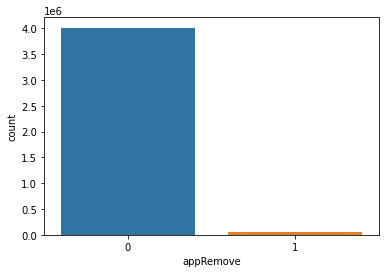

In [ ]:
sns.countplot(data=df_high,x="appRemove")

as we can see  the data is highly skewed

This ditribution of 99 percent positive and 1 percent positive proves loyal customers have very less probabilty of churnign

In [ ]:
df_high.appRemove.value_counts()/df_high.shape[0]

0    0.986508
1    0.013492
Name: appRemove, dtype: float64

In [ ]:
df_high['sessNum'].fillna(value=df_high['sessNum'].mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df_high.isnull().sum()

user_pseudo_id             0
sessNum                    0
appRemove                  0
screen_view                0
sum_in_app_exp             0
sum_special_features       0
sum_adsEvents              0
sum_engagement_events      0
sum_notification_events    0
sum_profile_visits         0
sum_app_event              0
dtype: int64

In [ ]:
correlation_mat = df_high.drop(["user_pseudo_id"],axis=1).corr()
correlation_mat.style.background_gradient(cmap='coolwarm')

,sessNum,appRemove,screen_view,sum_in_app_exp,sum_special_features,sum_adsEvents,sum_engagement_events,sum_notification_events,sum_profile_visits,sum_app_event
sessNum,1.000000,-0.071220,0.472067,0.314971,0.058940,0.325616,0.356115,0.360701,0.471332,0.089794
appRemove,-0.071220,1.000000,-0.029048,-0.019742,0.001638,-0.024725,-0.028213,-0.023603,-0.042826,-0.000071
screen_view,0.472067,-0.029048,1.000000,0.565284,0.135090,0.564390,0.601551,0.332915,0.440071,0.036004
sum_in_app_exp,0.314971,-0.019742,0.565284,1.000000,0.082090,0.334422,0.456247,0.266845,0.302616,0.004840
sum_special_features,0.058940,0.001638,0.135090,0.082090,1.000000,0.048356,0.170474,0.034870,0.069907,0.010224
sum_adsEvents,0.325616,-0.024725,0.564390,0.334422,0.048356,1.000000,0.354878,0.230114,0.258965,0.009584
sum_engagement_events,0.356115,-0.028213,0.601551,0.456247,0.170474,0.354878,1.000000,0.204212,0.326150,0.012104
sum_notification_events,0.360701,-0.023603,0.332915,0.266845,0.034870,0.230114,0.204212,1.000000,0.364976,-0.000987
sum_profile_visits,0.471332,-0.042826,0.440071,0.302616,0.069907,0.258965,0.326150,0.364976,1.000000,0.007941
sum_app_event,0.089794,-0.000071,0.036004,0.004840,0.010224,0.009584,0.012104,-0.000987,0.007941,1.000000


In [ ]:
df_test = df_high[(df_high.appRemove == 0)].sample(100000,random_state= 0)

In [ ]:
df_high = df_high[~df_high.isin(df_test)].dropna()

In [ ]:
df_test.shape

(100000, 11)

In [ ]:
df_high.shape

(5597823, 11)

In [ ]:
df_not = df_high[(df.appRemove == 0)].sample(100000,random_state= 0)
df_chu = df_high[(df.appRemove == 1)].sample(57000,random_state= 0)

df_final= pd.concat(
    [df_not,df_chu],
    axis=0,
    join="outer",
    ignore_index=True,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    copy=True,
)

Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.


In [ ]:
X = df_final.drop('appRemove',axis=1)
y= df_final['appRemove']

In [ ]:
X.drop("user_pseudo_id",axis=1,inplace=True)

In [ ]:
X.drop("sessNum",axis=1,inplace=True)

In [ ]:
print(len(y))
print(sum(y))
print(100*sum(y)/len(y))

157000
57000.0
36.30573248407644


In [ ]:
from sklearn.model_selection import train_test_split
X_train_model, X_test_model, y_train_model, y_test_model = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
print(len(y_train_model))
print(sum(y_train_model))
print(100*sum(y_train_model)/len(y_train_model))

105190
38084.0
36.20496244890199


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# define pipeline
smote = SMOTE(sampling_strategy=0.3)
under = RandomUnderSampler(sampling_strategy=0.7)
steps = [ ('u', under),('s', smote)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X_train_model, y_train_model = pipeline.fit_resample(X_train_model, y_train_model)

In [ ]:
print(len(y_train_model))
print(sum(y_train_model))
print(100*sum(y_train_model)/len(y_train_model))

3750541
38905.0
1.0373170163984342


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import xgboost as xgb

clf_xgb=xgb.XGBClassifier(objective='binary:logistic',seed=42)
kfold = KFold(n_splits=5, random_state=7,shuffle=True)
results = cross_val_score(clf_xgb, X_train_model, y_train_model, cv=kfold)

print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 81.99% (0.52%)


In [ ]:
import xgboost as xgb
clf_xgb=xgb.XGBClassifier(seed=42)
model = clf_xgb.fit(X_train_model,y_train_model,verbose=False)

In [ ]:
model

XGBClassifier(seed=42)

Confusion matrix : 
 [[16695  2221]
 [  670 32224]]
Outcome values : 
 32224 670 2221 16695
Classification report : 
               precision    recall  f1-score   support

           1       0.96      0.88      0.92     18916
           0       0.94      0.98      0.96     32894

    accuracy                           0.94     51810
   macro avg       0.95      0.93      0.94     51810
weighted avg       0.94      0.94      0.94     51810



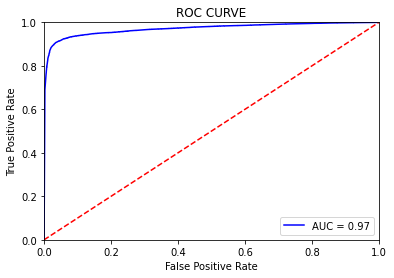

In [ ]:
y_pred = clf_xgb.predict(X_test_model)
make_con(y_pred,y_test_model)

proba = clf_xgb.predict_proba(X_test_model)
make_curve(proba,y_test_model)

In [ ]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 8.0 MB/s 
     |████████████████████████████████| 133 kB 42.9 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=9a77c0ad1b54937cf21ac43bfd28a75923a6998f55bf546eadcf9890b7bfb587
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is inco

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(X_test_model, y_test_model)
eli5.show_weights(perm, feature_names = X_test_model.columns.tolist())

Weight,Feature
0.2038 ± 0.0018,screen_view
0.0214 ± 0.0004,totalEventCount
0.0181 ± 0.0009,notification_events
0.0179 ± 0.0013,sessNum
0.0142 ± 0.0010,engTime_sec
0.0085 ± 0.0004,personalization_assignment
0.0061 ± 0.0003,interstitial_ad_events
0.0046 ± 0.0004,bottom_option_click_event
0.0045 ± 0.0005,user_engagement
0.0040 ± 0.0007,remove_ads_purchase_event


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap
explainer = shap.TreeExplainer(clf_xgb)
shap_values = explainer.shap_values(X_test_model)

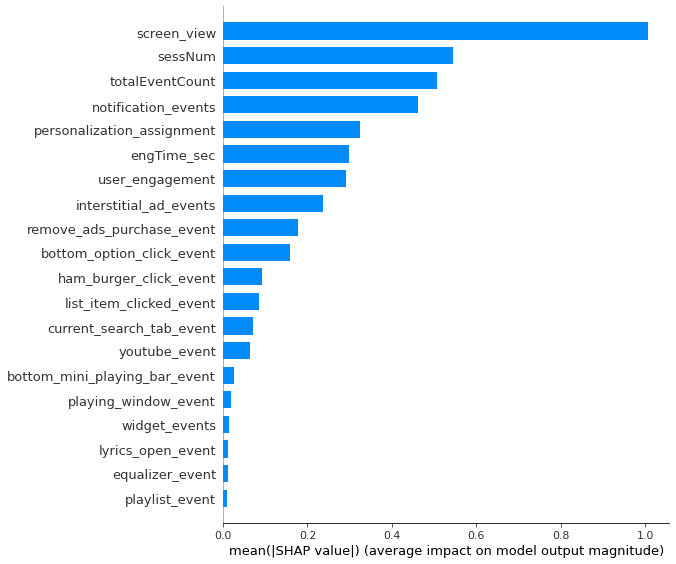

In [ ]:
shap.summary_plot(shap_values, X_test_model, plot_type="bar")

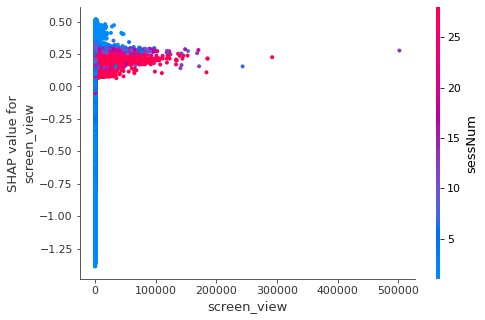

In [ ]:
shap.dependence_plot("screen_view", shap_values, X_test_model)

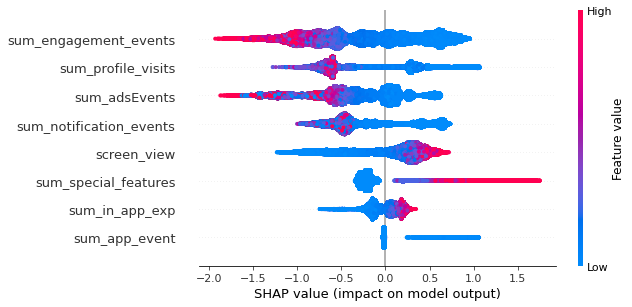

In [ ]:
shap.summary_plot(shap_values, X_test_model)

# **Applyig logistic regression**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

logreg= LogisticRegression()
kfold = KFold(n_splits=5, random_state=7,shuffle=True)
results = cross_val_score(logreg, X_train_model, y_train_model, cv=kfold)

print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 82.04% (0.29%)


Let's Do a grid search for hyperparameter tuning in logistic regression

---



In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_model = scaler.fit_transform(X_train_model)
X_test_model = scaler.transform(X_test_model)


In [ ]:
# GRID SEARCH FOR HYPER PARAMETER TUNING
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

logreg_new = LogisticRegression(random_state=1)
parameters = [{'penalty':['l1','l2'],
               'solver':['liblinear'],
               'tol':[0.01,0.1],
                },
              {
                'penalty':['l2','none'],
               'solver':['lbfgs'],
               'tol':[0.01,0.1],
               'max_iter':[1000,500]
              },
              {
                'penalty':['elasticnet'],
                'l1_ratio':[0.2,0.4],
               'solver':['saga'],
               'tol':[0.01,0.1],
              }
]



grid_search = GridSearchCV(estimator = logreg_new,  
                           param_grid = parameters,
                           scoring = ['roc_auc'],
                           refit = 'roc_auc',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train_model, y_train_model)

# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))


GridSearch CV best score : 0.8620


Parameters that give the best results : 

 {'max_iter': 1000, 'penalty': 'none', 'solver': 'lbfgs', 'tol': 0.01}


Estimator that was chosen by the search : 

 LogisticRegression(max_iter=1000, penalty='none', random_state=1, tol=0.01)


In [ ]:
sns.set_style("darkgrid")

Confusion matrix : 
 [[14926  3990]
 [ 7812 25082]]
Outcome values : 
 25082 7812 3990 14926
Classification report : 
               precision    recall  f1-score   support

           1       0.66      0.79      0.72     18916
           0       0.86      0.76      0.81     32894

    accuracy                           0.77     51810
   macro avg       0.76      0.78      0.76     51810
weighted avg       0.79      0.77      0.78     51810



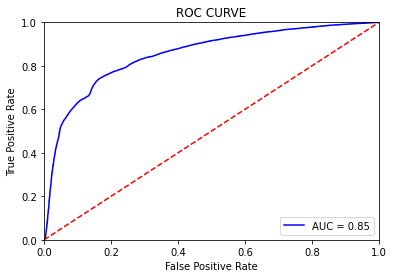

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
model = logreg.fit(X_train_model,y_train_model)

y_pred = logreg.predict(X_test_model)
make_con(y_pred,y_test_model)

proba = logreg.predict_proba(X_test_model)
make_curve(proba,y_test_model)

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(X_test_model, y_test_model)
eli5.show_weights(perm, feature_names = X_test_model.columns.tolist())

Weight,Feature
0.2029 ± 0.0030,sessNum
0.0189 ± 0.0016,sum_engagement_events
0.0135 ± 0.0010,screen_view
0.0070 ± 0.0008,sum_profile_visits
0.0020 ± 0.0005,sum_in_app_exp
0.0019 ± 0.0007,sum_adsEvents
0.0008 ± 0.0003,sum_notification_events
0.0005 ± 0.0002,sum_special_features
0.0003 ± 0.0001,sum_app_event


We Got our best parametere
now its time to train the model on whole dataset than we can run it 
on our global test 

---



In [ ]:
logreg = LogisticRegression(**grid_search.best_params_)
model = logreg.fit(X,y)

In [ ]:
scaled_test_set = fit.transform(df_test.drop(["user_pseudo_id","appRemove","sessNum"],axis=1))

In [ ]:
proba = model.predict_proba(scaled_test_set)
proba[:,1]

X does not have valid feature names, but LogisticRegression was fitted with feature names


array([0.69527652, 0.69408073, 0.69392871, ..., 0.69434078, 0.69508659,
       0.6948036 ])

# **Generating the output. Probability of churning and their rank**

In [ ]:
Final_Results = pd.DataFrame({ "user_pseudo_id": df_test.user_pseudo_id,"churn_probability" :  proba[:,1]})
Final_Results = Final_Results.reset_index(drop = True)
Final_Results.head()

,user_pseudo_id,churn_probability
0,bb709eb429cda1ebfb20bf8a0ab1c2da,0.029390
1,cb9cb3dbeeb74d7772d6c963745b670b,0.036225
2,c14bde19f9d808a921490c50ae7a20e8,0.501013
3,6f5c5d51ef2ffe11b6def62a69226888,0.411659
4,135a18f38132027a86fb537cb03f3968,0.416682


In [ ]:
Final_Results["rank"] = (Final_Results.churn_probability.rank(method='max',ascending=False)).astype('int')
Final_Results['rank'] = (Final_Results["rank"] -( Final_Results.loc[0,"rank"]-1))

In [ ]:
Final_Results = Final_Results.sort_values(by="rank")

In [ ]:
Final_Results["rank"] = Final_Results["rank"] +77899
Final_Results

,user_pseudo_id,churn_probability,rank
26082,a37027d697cad5cb23d8e635807cb840,1.000000e+00,1
18824,02fc14f93e2cf9cbf9f5e9216c9a1e43,1.000000e+00,1
49606,cc3e539b96278571a30efd9a7d7b5069,9.999823e-01,2
1126,4dd5faae5dccf86ff9534c7b814ef760,9.999617e-01,3
65975,336dbc16e4e254251df3693e29267b04,9.999220e-01,4
...,...,...,...
43345,647f02e6730dd9513c1469e176efdcea,6.064739e-09,99995
20071,ae253d981dfef64e0aab64df41d4b7f0,5.183242e-09,99996
74309,02c8ca7483f8a6a563ba9074555a6156,4.284111e-09,99997
42345,91892ceb71c82c5fe7d0921f9a62e159,3.513822e-09,99998


In [ ]:
Final_Results.to_csv("old_user_probility_prediction.csv",header=True,index=False)

**Principal component analysis**

---



In [ ]:
df.head()

,user_pseudo_id,widget_events,totalEventCount,bottom_mini_playing_bar_event,sessNum,notification_events,video_notification_event,app_clear_data,floating_player_event,interstitial_ad_events,...,lyrics_open_event,playing_window_event,top_tab_event,inside_page_events,youtube_event,ham_burger_click_event,font_change_event,engTime_sec,equalizer_event,settings_page_events
0,c75a7a99f51a8f4e578943bf9bb0b2ed,0,1,0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,0,0
1,45f3e2ee9cc17dba89227869f8c6adf5,0,627,232,12.0,560,48,0,0,56,...,0,512,0,0,48,8,0,2695.690,0,0
2,f1a38b974675019f7a1f63ea8a1c075d,0,123,0,5.0,480,0,0,0,0,...,0,256,0,0,0,0,0,159.483,0,0
3,045441ffe13ac1d934659a8c9a536914,0,26,0,3.0,32,0,0,0,0,...,0,0,0,0,0,0,0,80.546,0,0
4,2280b60eb3247cf54063e3d264e10172,0,1,0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,7.061,0,0


Need to take sample of data inorder to avoid crashing of the system

In [ ]:
user_data = df_high.drop("user_pseudo_id",axis=1)
user_id = df_high.user_pseudo_id

In [ ]:
col_to_take = ['sessNum', 'screen_view', 'sum_in_app_exp',
       'sum_special_features', 'sum_adsEvents', 'sum_engagement_events',
       'sum_notification_events', 'sum_profile_visits']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
user_scaled = scaler.fit_transform(user_data.loc[:, user_data.columns != 'appRemove'])
user_scaled_df = pd.DataFrame(user_scaled,columns=col_to_take)
user_churn = user_data['appRemove'].to_numpy()

Scaled DataFrame

As we can see all the values have been scaled and now we can run our principal componenet analysis

In [ ]:
user_scaled_df.isnull().sum()

sessNum                    0
screen_view                0
sum_in_app_exp             0
sum_special_features       0
sum_adsEvents              0
sum_engagement_events      0
sum_notification_events    0
sum_profile_visits         0
dtype: int64

In [ ]:
user_scaled_df['sessNum'].fillna(value=user_scaled_df['sessNum'].mean(), inplace=True)

In [ ]:
from sklearn.decomposition import PCA

# Number of components two for visualization
pca = PCA(n_components=2)
user_two_feature = pd.DataFrame(pca.fit_transform(user_scaled_df),columns=['PC1','PC2'])

In [ ]:
user_two_feature

,PC1,PC2
0,0.036785,0.467195
1,-0.302837,0.030422
2,0.132510,0.405055
3,-0.303713,-0.001017
4,0.666364,0.285230
...,...,...
4136793,-0.232419,-0.034663
4136794,-0.314685,-0.022540
4136795,-0.089581,-0.059144
4136796,-0.079581,-0.023272


GRID SEARCH USING LOGISTic REGRESSION

---

⚓